# Analyse Results for Transfer Learning tests
- Australian data
- Ensemble size is 20
- 20 Ensembles
- Compare full transfer and frozen layers with no transfer learning

## Imports

In [1]:
import glob
import json
import os
import pandas as pd
import random

from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import initialise
import common
from analysis_utils import calc_statistics, sort_file_list
from display_utils import display_frames

## Directories and other settings
- Update the model directories as required

In [2]:
results_dir = os.path.join(common.DATA_DIR, 'Results', 'Australia')
#output_dir = common.FIGURES_DIR
precision = 2       # floating point precision for saved predictions
all_stats = []
file_names = ['Source-only', 'Target-only', 'Naive', 'Freeze-1st',
              'Sourcerer', 'Freeze-BN', 'Sourcerer-reg', 'AdaBN']
all_tests = ['Source-only', 'Target-only', 'Naive\nFine-tuning', 'Freeze-1st',
             'Sourcerer', 'Freeze-BN', 'Sourcerer-reg', 'AdaBN']

In [3]:
stats = []
for fn in file_names:
    stats.append(pd.read_csv(os.path.join(results_dir, f"{fn}_stats.csv"), index_col=0))

In [4]:
display_frames([pd.concat([df.mean() for df in stats], axis=1, keys=file_names).T.drop(columns='Count'),
                pd.concat([df.std() for df in stats], axis=1, keys=file_names).T.drop(columns='Count'),
                pd.concat([df.min() for df in stats], axis=1, keys=file_names).T.drop(columns='Count'),
                pd.concat([df.max() for df in stats], axis=1, keys=file_names).T.drop(columns='Count')],
               ['Means', 'Standard Deviations', 'Minimums', 'Maximums'], precision=2)

,RMSE,R2,Bias
Source-only,65.14,-0.75,-46.88
Target-only,44.13,0.20,-13.41
Naive,34.71,0.51,-3.27
Freeze-1st,32.90,0.56,-4.48
Sourcerer,34.43,0.51,-3.37
Freeze-BN,32.25,0.57,-4.22
Sourcerer-reg,33.94,0.53,2.32
AdaBN,37.20,0.43,-4.69
,RMSE,R2,Bias
Source-only,5.08,0.27,6.93


## Figures

In [5]:
all_results = pd.concat(stats, keys=all_tests)[['RMSE', 'R2', 'Bias']]
all_results = all_results.loc[all_results.R2.groupby(level=0).mean().sort_values().index]

In [6]:
all_results.groupby(level=0).mean().round(2)

,RMSE,R2,Bias
AdaBN,37.20,0.43,-4.69
Freeze-1st,32.90,0.56,-4.48
Freeze-BN,32.25,0.57,-4.22
Naive\nFine-tuning,34.71,0.51,-3.27
Source-only,65.14,-0.75,-46.88
Sourcerer,34.43,0.51,-3.37
Sourcerer-reg,33.94,0.53,2.32
Target-only,44.13,0.20,-13.41


In [7]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

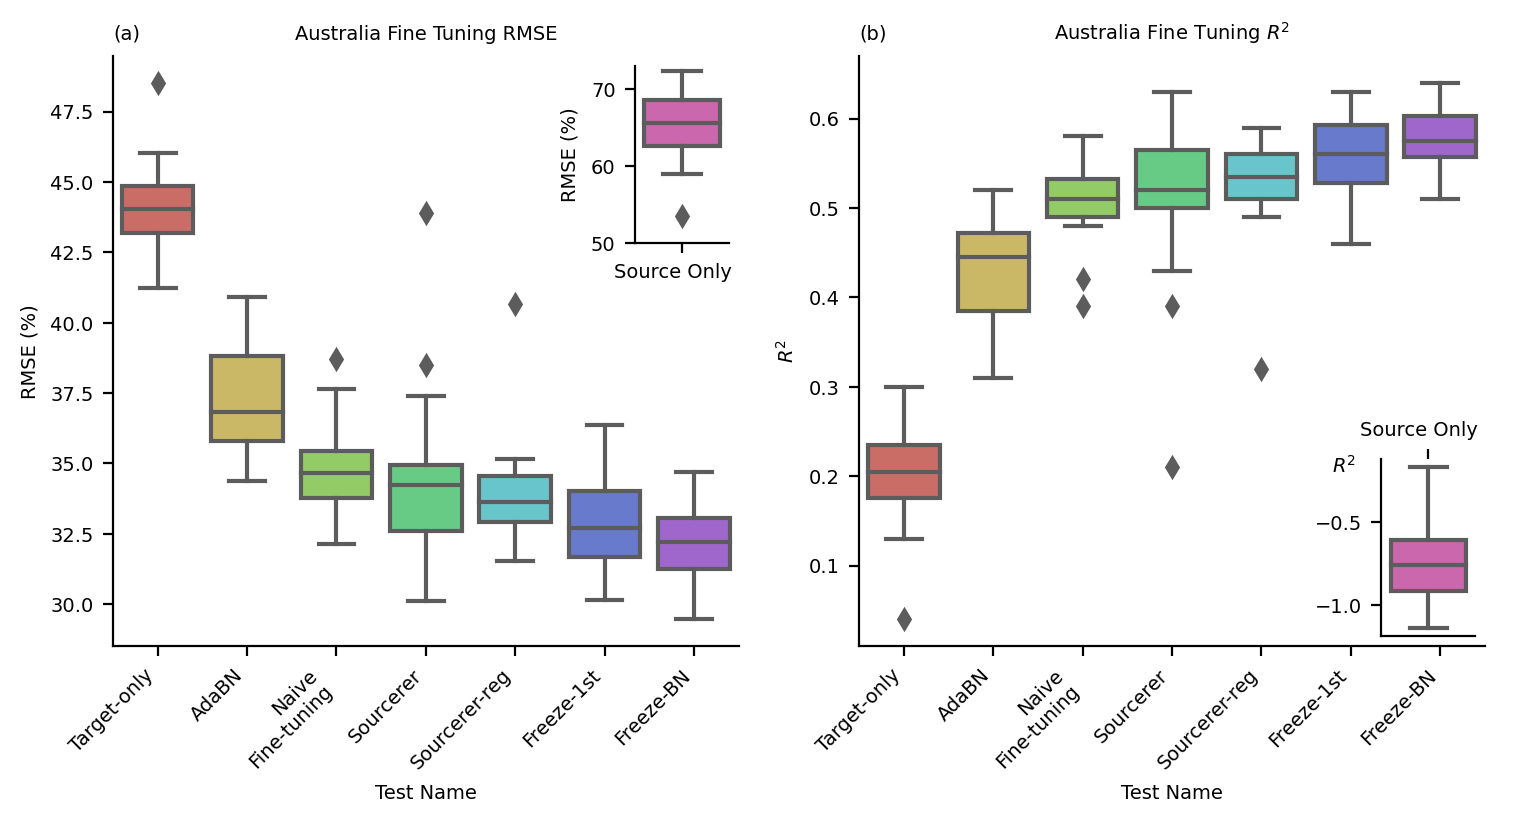

In [8]:
sns.set_palette("hls", 8)
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(7.408, 4.0), dpi=200, layout='constrained',
                          gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

data = all_results['RMSE'].drop(index='Source-only', level=0).reset_index()
axes[0] = sns.boxplot(data=data, x='level_0', y='RMSE', ax=axes[0])
axes[0].set_xlabel('Test Name')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylabel('RMSE (%)')
axes[0].set_title('Australia Fine Tuning RMSE')
axes[0].set_title('(a)', loc='left')

data = all_results['R2'].drop(index='Source-only', level=0).reset_index()
axes[1] = sns.boxplot(data=data, x='level_0', y='R2', ax=axes[1])
axes[1].set_xlabel('Test Name')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylabel('$R^2$')
axes[1].set_title('Australia Fine Tuning $R^2$')
axes[1].set_title('(b)', loc='left')

colours_ = sns.color_palette()[7:]
axins0 = inset_axes(axes[0], width="15%", height="30%")
data = all_results['RMSE'][['Source-only']].reset_index()
sns.boxplot(data=data, x='level_0', y='RMSE', ax=axins0, palette=colours_)
axins0.set_xlabel(None)
axins0.set_xticklabels(['Source Only   '])
axins0.set_ylim(50, 73)
axins0.set_ylabel('RMSE (%)')

axins1 = inset_axes(axes[1], width="15%", height="30%", loc=4)
data = all_results['R2'][['Source-only']].reset_index()
sns.boxplot(data=data, x='level_0', y='R2', ax=axins1, palette=colours_)
axins1.xaxis.tick_top()
axins1.set_xticklabels(['Source Only   '])
axins1.set_xlabel(None)
axins1.set_ylabel('$R^2$', rotation=0)
axins1.yaxis.set_label_coords(-0.4, 0.9)

for ax in [axes[0], axes[1], axins0, axins1]:
    for axis in ['top', 'right']:
        ax.spines[axis].set_visible(False)

#fig1.savefig(os.path.join(output_dir, 'Australia result.jpeg'), format="jpeg", bbox_inches='tight', pad_inches=0.05, dpi=500)